Farmlink
========

In [327]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [328]:
df = pd.read_csv(r"FarmlinkMainData.csv")
df = df.drop(10704) # just the column names again, not sure why this is here
df.head()

,id,status,Sends,Opens,Clicks,lifetodategiving,yeartodategiving,lastgiftamount,lastgiftdate,ContactType,MonetaryTier,DonorStatus,IndividualDonorType,Tier3Classification
0,89ce7fad62fd5b95aaadaa1edb786cc0,subscribed,112,3,2,200,0,200,4/23/2020,Donor,Diamond,SingleDonor,Single Donor,Single Donor
1,778fdf5a21efed6e372e0e0bc159f92d,subscribed,112,112,3,50,0,50,4/23/2020,Donor,Gold,SingleDonor,Single Donor,Single Donor
2,778fdf5a21efed6e372e0e0bc159f92d,subscribed,112,112,3,50,0,50,4/23/2020,Donor,Gold,SingleDonor,Single Donor,Single Donor
3,cec49095c9aef6252fbd30aae5345792,subscribed,112,29,2,200,0,200,4/23/2020,Donor,Diamond,SingleDonor,Single Donor,Single Donor
4,778fdf5a21efed6e372e0e0bc159f92d,subscribed,112,112,3,50,0,50,4/23/2020,Donor,Gold,SingleDonor,Single Donor,Single Donor


### Cleaning

In [329]:
# Type correcting --> eventually will have to one-hot-encode probably
df["Sends"] = pd.to_numeric(df["Sends"])
df["Opens"] = pd.to_numeric(df["Opens"])
df["Clicks"] = pd.to_numeric(df["Clicks"])
df["lifetodategiving"] = pd.to_numeric(df["lifetodategiving"])
df["yeartodategiving"] = pd.to_numeric(df["yeartodategiving"])
df["lastgiftamount"] = pd.to_numeric(df["lastgiftamount"])
df["lastgiftdate"] = pd.to_datetime(df["lastgiftdate"])
df.dtypes, df.shape

(id                             object
 status                         object
 Sends                           int64
 Opens                           int64
 Clicks                          int64
 lifetodategiving                int64
 yeartodategiving                int64
 lastgiftamount                  int64
 lastgiftdate           datetime64[ns]
 ContactType                    object
 MonetaryTier                   object
 DonorStatus                    object
 IndividualDonorType            object
 Tier3Classification            object
 dtype: object,
 (18372, 14))

### Cleaning

In [330]:
# ids are non-unique
ids = df["id"]
unique_ids, counts = np.unique(ids, return_counts=True)
print("All ids are unique?", len(unique_ids) == len(ids))

nonunique_ids = unique_ids[counts > 1]
print("Number of non-unique ids:", len(nonunique_ids))

# repeated ids are just repeated entries in the data
# ==> data just tracks most recent donation, with clicks being the number of donations per user (might be useful to know when previous donations were made)
# ==> recency bias (worth keeping in mind)
print("Duplicate ids only:")
display(df[df["id"].isin(nonunique_ids)])

df_no_duplicates = df.drop_duplicates(subset="id", keep="first")
print("No duplicates:")
display(df_no_duplicates)

All ids are unique? False
Number of non-unique ids: 904
Duplicate ids only:


,id,status,Sends,Opens,Clicks,lifetodategiving,yeartodategiving,lastgiftamount,lastgiftdate,ContactType,MonetaryTier,DonorStatus,IndividualDonorType,Tier3Classification
1,778fdf5a21efed6e372e0e0bc159f92d,subscribed,112,112,3,50,0,50,2020-04-23,Donor,Gold,SingleDonor,Single Donor,Single Donor
2,778fdf5a21efed6e372e0e0bc159f92d,subscribed,112,112,3,50,0,50,2020-04-23,Donor,Gold,SingleDonor,Single Donor,Single Donor
4,778fdf5a21efed6e372e0e0bc159f92d,subscribed,112,112,3,50,0,50,2020-04-23,Donor,Gold,SingleDonor,Single Donor,Single Donor
5,6f6f6b553e98c17511288f863d274e4c,subscribed,113,42,0,0,0,0,2020-04-24,Donor,Platinum,SingleDonor,Single Donor,Single Donor
7,6f6f6b553e98c17511288f863d274e4c,subscribed,113,42,0,0,0,0,2020-04-24,Donor,Platinum,SingleDonor,Single Donor,Single Donor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18348,5236354c639af903e05e4ca8409e4233,subscribed,51,46,0,0,0,0,NaT,Non-Donor,NaN,NaN,NaN,NaN
18364,2548f5ed6ca2490d2daae5933437f8f5,subscribed,32,3,2,0,0,0,NaT,Non-Donor,NaN,NaN,NaN,NaN
18369,e23b9602b47f4417221dca835e623b87,subscribed,99,217,66,0,0,0,NaT,Non-Donor,NaN,NaN,NaN,NaN
18370,bd3f2052fd4fc563391a7da2237bf44f,subscribed,105,42,0,0,0,0,NaT,Non-Donor,NaN,NaN,NaN,NaN


No duplicates:


,id,status,Sends,Opens,Clicks,lifetodategiving,yeartodategiving,lastgiftamount,lastgiftdate,ContactType,MonetaryTier,DonorStatus,IndividualDonorType,Tier3Classification
0,89ce7fad62fd5b95aaadaa1edb786cc0,subscribed,112,3,2,200,0,200,2020-04-23,Donor,Diamond,SingleDonor,Single Donor,Single Donor
1,778fdf5a21efed6e372e0e0bc159f92d,subscribed,112,112,3,50,0,50,2020-04-23,Donor,Gold,SingleDonor,Single Donor,Single Donor
3,cec49095c9aef6252fbd30aae5345792,subscribed,112,29,2,200,0,200,2020-04-23,Donor,Diamond,SingleDonor,Single Donor,Single Donor
5,6f6f6b553e98c17511288f863d274e4c,subscribed,113,42,0,0,0,0,2020-04-24,Donor,Platinum,SingleDonor,Single Donor,Single Donor
6,c7c9e65b8729d427e68e71a209e8a0be,subscribed,112,43,3,200,0,200,2020-04-24,Donor,Diamond,SingleDonor,Single Donor,Single Donor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18365,811d95cd7ea34bb668a98c7f43eeea65,subscribed,0,0,0,0,0,0,NaT,Non-Donor,NaN,NaN,NaN,NaN
18366,3af3e59097f576efe5dab7b5c8089c5e,subscribed,0,0,0,0,0,0,NaT,Non-Donor,NaN,NaN,NaN,NaN
18367,d245e3721c746e4dcb57b2226bd8550c,subscribed,0,0,0,0,0,0,NaT,Non-Donor,NaN,NaN,NaN,NaN
18368,e8a15faf47a94501f30df33272fc03fd,subscribed,0,0,0,0,0,0,NaT,Non-Donor,NaN,NaN,NaN,NaN


In [331]:
# Significant missing data in: lastgiftdate, MonetaryTier, IndividualDonorType, Tier3Classification
for label in df_no_duplicates:
    column = df_no_duplicates[label].to_numpy()
    print("Column name:", label, "- dtype", column.dtype)
    try:
        print(f"% missing data: {np.count_nonzero(np.isnan(column)) / len(df_no_duplicates[label]) * 100}")
    except TypeError:
        print(f"% missing data: {np.count_nonzero([np.isnan(i) for i in column if isinstance(i, float)]) / len(df_no_duplicates[label]) * 100}")


Column name: id - dtype object
% missing data: 0.0
Column name: status - dtype object
% missing data: 0.0
Column name: Sends - dtype int64
% missing data: 0.0
Column name: Opens - dtype int64
% missing data: 0.0
Column name: Clicks - dtype int64
% missing data: 0.0
Column name: lifetodategiving - dtype int64
% missing data: 0.0
Column name: yeartodategiving - dtype int64
% missing data: 0.0
Column name: lastgiftamount - dtype int64
% missing data: 0.0
Column name: lastgiftdate - dtype datetime64[ns]
% missing data: 41.60226092974968
Column name: ContactType - dtype object
% missing data: 0.0
Column name: MonetaryTier - dtype object
% missing data: 39.78544238089745
Column name: DonorStatus - dtype object
% missing data: 39.78544238089745
Column name: IndividualDonorType - dtype object
% missing data: 41.59649325181682
Column name: Tier3Classification - dtype object
% missing data: 41.29657399930788


In [332]:
df_nans = df_no_duplicates[np.isnan(df_no_duplicates["lastgiftdate"].to_numpy())]
df_no_nans = df_no_duplicates[~np.isnan(df_no_duplicates["lastgiftdate"].to_numpy())]

# It would appear that the majority of NaN values are clustered --> mostly missing rows as opposed to normal rows with missing labels
# ==> we can just use the no_nan table going forward (remove 7k of 18k rows --> significant, but data is basically useless)
nan_columns = ["lastgiftdate", "MonetaryTier", "DonorStatus", "IndividualDonorType", "Tier3Classification"]
print("In the NaN table:")
for label in df_nans[nan_columns]:
    column = df_nans[label].to_numpy()
    print("Column name:", label, "- dtype", column.dtype)
    print(f"% missing data: {np.count_nonzero([np.isnan(i) for i in column if isinstance(i, float)]) / len(df_nans[label]) * 100}")

print("\nIn the no-NaN table:")
for label in df_no_nans[nan_columns]:
    column = df_no_nans[label].to_numpy()
    print("Column name:", label, "- dtype", column.dtype)
    print(f"% missing data: {np.count_nonzero([np.isnan(i) for i in column if isinstance(i, float)]) / len(df_no_nans[label]) * 100}")

print(df_nans.shape, df_no_nans.shape)

In the NaN table:
Column name: lastgiftdate - dtype datetime64[ns]
% missing data: 0.0
Column name: MonetaryTier - dtype object
% missing data: 95.6328850686261
Column name: DonorStatus - dtype object
% missing data: 95.6328850686261
Column name: IndividualDonorType - dtype object
% missing data: 99.986136143075
Column name: Tier3Classification - dtype object
% missing data: 99.26521558297519

In the no-NaN table:
Column name: lastgiftdate - dtype datetime64[ns]
% missing data: 0.0
Column name: MonetaryTier - dtype object
% missing data: 0.0
Column name: DonorStatus - dtype object
% missing data: 0.0
Column name: IndividualDonorType - dtype object
% missing data: 0.0
Column name: Tier3Classification - dtype object
% missing data: 0.0
(7213, 14) (10125, 14)


### EDA

In [333]:
# Create `days_since_gift` column for each gift --> number of days from gift to when data was collected
df_no_nans["days_since_gift"] = [(df_no_nans["lastgiftdate"].max() - date).days for date in df_no_nans["lastgiftdate"]]
df_no_nans

/var/folders/nr/89kljhmj4mx8j6_g2_mz43380000gn/T/ipykernel_37000/332575251.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_nans["days_since_gift"] = [(df_no_nans["lastgiftdate"].max() - date).days for date in df_no_nans["lastgiftdate"]]


,id,status,Sends,Opens,Clicks,lifetodategiving,yeartodategiving,lastgiftamount,lastgiftdate,ContactType,MonetaryTier,DonorStatus,IndividualDonorType,Tier3Classification,days_since_gift
0,89ce7fad62fd5b95aaadaa1edb786cc0,subscribed,112,3,2,200,0,200,2020-04-23,Donor,Diamond,SingleDonor,Single Donor,Single Donor,866
1,778fdf5a21efed6e372e0e0bc159f92d,subscribed,112,112,3,50,0,50,2020-04-23,Donor,Gold,SingleDonor,Single Donor,Single Donor,866
3,cec49095c9aef6252fbd30aae5345792,subscribed,112,29,2,200,0,200,2020-04-23,Donor,Diamond,SingleDonor,Single Donor,Single Donor,866
5,6f6f6b553e98c17511288f863d274e4c,subscribed,113,42,0,0,0,0,2020-04-24,Donor,Platinum,SingleDonor,Single Donor,Single Donor,865
6,c7c9e65b8729d427e68e71a209e8a0be,subscribed,112,43,3,200,0,200,2020-04-24,Donor,Diamond,SingleDonor,Single Donor,Single Donor,865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10699,589ec91a2ec0cfdabeae1176e9e03b12,subscribed,87,17,10,321,11,11,2022-09-02,Donor,Silver,SingleDonor,Multiple Single Donations,Multiple Single Donations,4
10700,30224a0678792ebc3397051ac0dcf338,subscribed,87,62,7,20,20,10,2022-09-05,Donor,Silver,Recurring Donor - Past Due Payment,Multiple Single Donations,Monthly,1
10701,2edb69d637bdf219d9d84364952900ca,transactional,0,0,0,0,421,106,2022-09-06,Donor,Diamond,SingleDonor,Multiple Single Donations,Multiple Single Donations,0
10702,fa12a4e0b7814f1775ea05781be1d8da,subscribed,113,11,7,0,421,106,2022-09-06,Donor,Diamond,SingleDonor,Multiple Single Donations,Multiple Single Donations,0


array([[<Axes: title={'center': 'lastgiftdate'}>]], dtype=object)

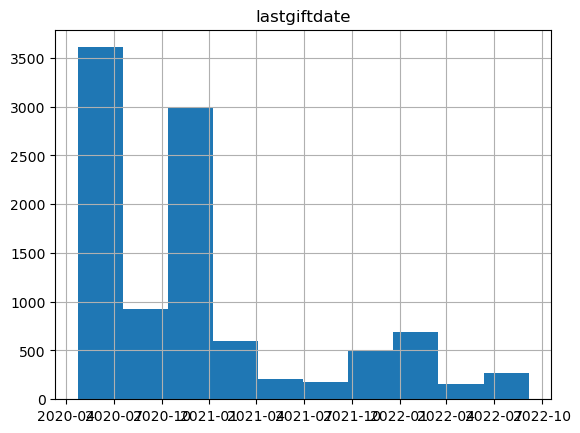

In [334]:
# Significant drop-off in number of donations
df_no_nans.hist("lastgiftdate")

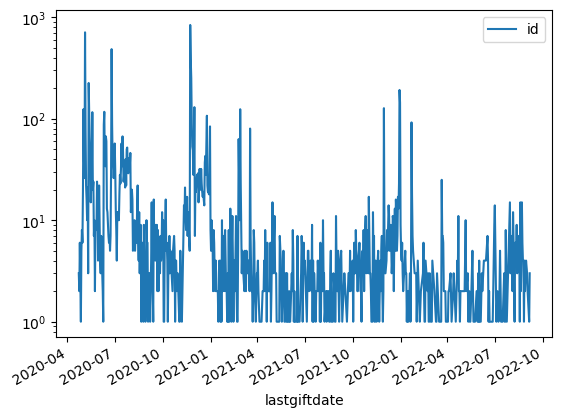

,id
lastgiftdate,
2020-04-23,3
2020-04-24,2
2020-04-25,6
2020-04-27,1
2020-04-28,5
...,...
2022-08-30,4
2022-09-01,3
2022-09-02,2


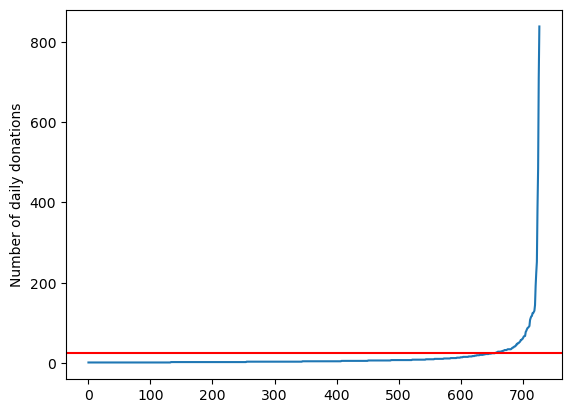

In [335]:
# Spikes in donation on certain days --> corresponds to fundraising events? no apparent pattern (note the log scale)
df_groupby_date = df_no_nans[["lastgiftdate", "id"]].groupby("lastgiftdate").count()
df_groupby_date.plot.line()
plt.yscale("log")
plt.show()
display(df_groupby_date)

# Two seperate datasets: one of "average" days and one of "big" days with cut-off point at around 20 donations/day (arbitrarily)
plt.plot(np.array(df_groupby_date.sort_values("id")["id"]))  # Better way to do this? probably
plt.ylabel("Number of daily donations")
plt.axhline(y=25, color="red")
plt.show()

In [336]:
cutoff = 25

df_no_nans["daily_donations"] = [df_groupby_date.loc[date]["id"] for date in df_no_nans["lastgiftdate"]]

df_big_days = df_no_nans[df_no_nans["daily_donations"] > cutoff]
df_normal_days = df_no_nans[df_no_nans["daily_donations"] <= cutoff]

print(f"{len(np.unique(df_big_days['lastgiftdate'].to_numpy()))} big days with a total of {df_big_days.shape[0]} donations.")
print(f"{len(np.unique(df_normal_days['lastgiftdate'].to_numpy()))} normal days with a total of {df_normal_days.shape[0]} donations.")

70 big days with a total of 6675 donations.
658 normal days with a total of 3450 donations.


/var/folders/nr/89kljhmj4mx8j6_g2_mz43380000gn/T/ipykernel_37000/233062509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_nans["daily_donations"] = [df_groupby_date.loc[date]["id"] for date in df_no_nans["lastgiftdate"]]


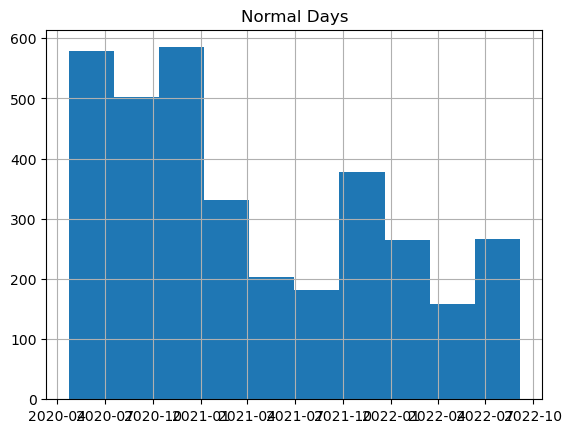

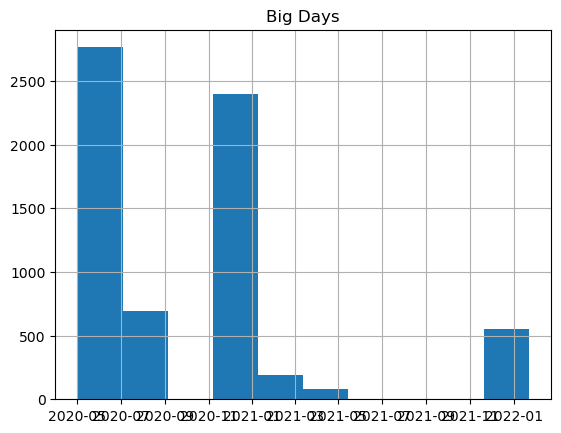

In [337]:
# Reduction in donations on both "normal" and "big" days --> remains the case even trying several cutoffs in the range [15, 50]
df_normal_days.hist("lastgiftdate")
plt.title("Normal Days")
plt.show()

df_big_days.hist("lastgiftdate")
plt.title("Big Days")
plt.show()

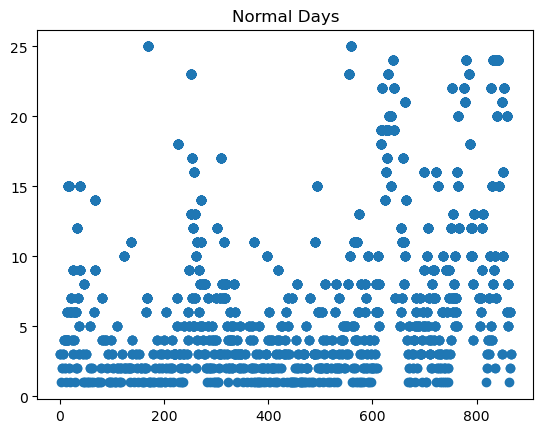

Correlation coefficient: 0.3767537490812164


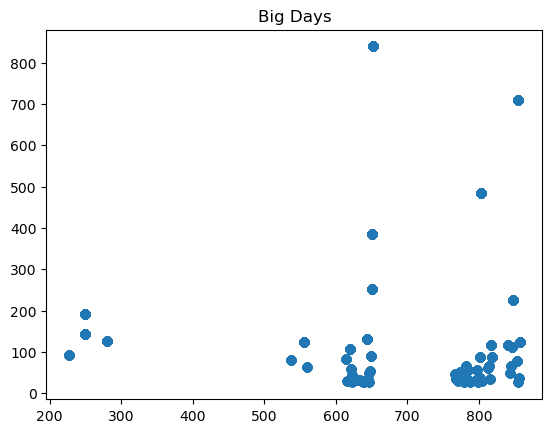

Correlation coefficient: 0.1192899678944392


In [338]:
# Positive corr. coeff. ==> negative correlation between recency and number of donations (despite recency bias!!)
plt.scatter(df_normal_days["days_since_gift"], df_normal_days["daily_donations"])
plt.title("Normal Days")
plt.show()
print(f'Correlation coefficient: {np.corrcoef(df_normal_days["days_since_gift"], df_normal_days["daily_donations"])[0][1]}')

# Big days also appear to be clustered into 3-4 main clusters
plt.scatter(df_big_days["days_since_gift"], df_big_days["daily_donations"])
plt.title("Big Days")
plt.show()
print(f'Correlation coefficient: {np.corrcoef(df_big_days["days_since_gift"], df_big_days["daily_donations"])[0][1]}')

In [339]:
# Clusters of big donations in summer of 2020, winter 2020/2021, winter 20212022
unique_big_days = df_big_days["lastgiftdate"].drop_duplicates(keep="first")
unique_big_months = np.sort( np.unique(np.array([datetime.date(d.year, d.month, 1) for d in unique_big_days], dtype="datetime64[M]")) )
unique_big_months

array(['2020-05', '2020-06', '2020-07', '2020-11', '2020-12', '2021-02',
       '2021-03', '2021-11', '2021-12', '2022-01'], dtype='datetime64[M]')